# Dimensionality Reduction Techniques

### Linear Discriminant Analysis (LDA)
Perform classification of NIR spectra data with Linear Discriminant Analysis.
https://github.com/nevernervous78/nirpyresearch

In [58]:
%cd "/home/mona/3074 ML Lab/Datasets"

/home/mona/3074 ML Lab/Datasets


In [42]:
import pandas as pd
import numpy as np
import time
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from sklearn.neighbors import KNeighborsClassifier

wine = pd.read_csv("milk_powder.csv")
df = wine.copy()


In [43]:
#MLP Classifier
def model_fit_and_predict(train_x, train_y, test_x, test_y):
    mlp = MLPClassifier(hidden_layer_sizes=(10,5),max_iter=1000)
    start = time.time()
    mlp.fit(train_x,train_y)
    stop = time.time()
    print(f"Training time: {stop - start}s")
    predict = mlp.predict(test_x)
    print("Accuracy: ", accuracy_score(predict, test_y))
    print("Confusion Matrix")
    conf_mat = confusion_matrix(predict,test_y)
    print(conf_mat)
    print("Performance Evaluation")
    print(classification_report(predict,test_y))

In [44]:
def LDA(X, y):
    stdsc = StandardScaler()
    X_train_std = stdsc.fit_transform(X)
    
    S_W = np.zeros((4,4))
    for i in range(3):
        S_W += np.cov(X_train_std[y==i].T)
        
    N=np.bincount(y) # number of samples for given class
    vecs=[]
    [vecs.append(np.mean(X_train_std[y==i],axis=0)) for i in range(3)] # class means
    mean_overall = np.mean(X_train_std, axis=0) # overall mean
    S_B=np.zeros((4,4))
    for i in range(3):
        S_B += N[i]*(((vecs[i]-mean_overall).reshape(4,1)).dot(((vecs[i]-mean_overall).reshape(1,4))))

    
    eigen_vals, eigen_vecs = np.linalg.eig(np.linalg.inv(S_W).dot(S_B))
    eigen_pairs = [(np.abs(eigen_vals[i]), eigen_vecs[:,i]) for i in range(len(eigen_vals))]
    eigen_pairs = sorted(eigen_pairs,key=lambda k: k[0], reverse=True)
    print('Eigenvalues in decreasing order:\n')
    for eigen_val in eigen_pairs:
        print(eigen_val[0])    
    
    W=np.hstack((eigen_pairs[0][1][:, ].reshape(4,1),eigen_pairs[1][1][:, ].reshape(4,1))).real
    X_train_lda = X_train_std.dot(W)
    return X_train_lda
    

###########

In [61]:
class LDA :
    def __init__(self, nComp=None) :
        self.nComp = nComp
        self.eigVect = None
    
    def transform(self, X, y) :
        height, width = X.shape
        uniqClasses = np.unique(y)
        numClasses = len(uniqClasses)
        
        scatterT = np.cov(X.T)*(height-1)
        scatterW = 0
        for i in range(numClasses) :
            classItems = np.flatnonzero(y == uniqClasses[i])
            scatterW = scatterW + np.cov(X.iloc[classItems].T)*(len(classItems)-1)
            
        scatterB = scatterT - scatterW
        _, eigVect = np.linalg.eigh(np.linalg.pinv(scatterW).dot(scatterB))
        print(eigVect.shape)
        pc = X.dot(eigVect[:, ::-1][:, :self.nComp])
        print(pc.shape)
        
        if self.nComp == 2 :
            if y is None :
                plt.scatter(pc[:, 0], pc[:, 1])
            else :
                colors = ['r', 'g', 'b']
                labels = np.unique(y)
                for color, label in zip(colors, labels) :
                    classData = pc.iloc[np.flatnonzero(y == label)]
                    plt.scatter(classData.iloc[:, 0], classData.iloc[:, 1], c=color)
            plt.show()
        return pc

In [62]:
LDA_obj1 = LDA(nComp=2)
data = pd.read_csv('/home/mona/Downloads/milk-powder.csv')
X, y = data.iloc[:, 2:], data.iloc[:, 1]
XTrain, XTest, YTrain, YTest = train_test_split(X, y, test_size=0.2)

(601, 601)
(176, 2)


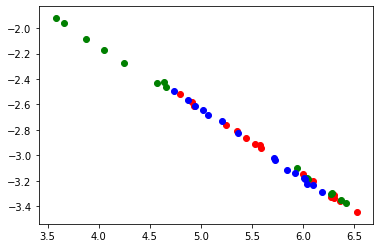

In [63]:
LDA_obj2 = LDA(nComp=2)
XTrainMod = LDA_obj2.transform(XTrain, YTrain)

In [64]:
print("Original Data Size:",XTrain.shape, "\nModified Data Size:", XTrainMod.shape)

Original Data Size: (176, 601) 
Modified Data Size: (176, 2)


################

In [57]:
# LDA dataset
data = df
x = df.iloc[:, 1:]
class_le = LabelEncoder()
y = df.iloc[:, 0]

x= LDA(x, y)
lda_df = pd.DataFrame(x , columns = ['LD1','LD2'])
lda_df = pd.concat([lda_df , pd.DataFrame(y)] , axis = 1)
lda_df.columns=["LD1","LD2","labels"]
lda_df.head()

/home/mona/anaconda3/lib/python3.7/site-packages/numpy/lib/function_base.py:393: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis)
/home/mona/anaconda3/lib/python3.7/site-packages/numpy/core/_methods.py:154: RuntimeWarning: invalid value encountered in true_divide
  ret, rcount, out=ret, casting='unsafe', subok=False)
/home/mona/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: RuntimeWarning: Degrees of freedom <= 0 for slice
  import sys
/home/mona/anaconda3/lib/python3.7/site-packages/numpy/lib/function_base.py:2455: RuntimeWarning: divide by zero encountered in true_divide
  c *= np.true_divide(1, fact)
/home/mona/anaconda3/lib/python3.7/site-packages/numpy/lib/function_base.py:2455: RuntimeWarning: invalid value encountered in multiply
  c *= np.true_divide(1, fact)


ValueError: operands could not be broadcast together with shapes (4,4) (601,601) (4,4) 

In [ ]:
#LDA MLP 
ldax_train,ldax_test,lday_train,lday_test = train_test_split(np.array(lda_df)[:,:-1],np.array(lda_df)[:,-1],test_size=0.20)
model_fit_and_predict(ldax_train,lday_train,ldax_test,lday_test)

In [ ]:
import seaborn as sns
markers = ['x','o']
sns.lmplot(x="LD1", y="LD2", data=lda_df, hue='target',legend=False, palette='rainbow')
plt.legend(loc='upper center')
plt.show()

### Principal Component Analysis (PCA)
Perform dimensionality reduction using PCA. Use your own dataset.

In [10]:
from sklearn.datasets import load_iris
iris = pd.read_csv("iris_data.csv")
df = iris.copy()

In [11]:
def PCA(X , num_components):
    X_meaned = X - np.mean(X , axis = 0)
    cov_mat = np.cov(X_meaned , rowvar = False)
    eigen_values , eigen_vectors = np.linalg.eigh(cov_mat)
    sorted_index = np.argsort(eigen_values)[::-1]
    sorted_eigenvalue = eigen_values[sorted_index]
    sorted_eigenvectors = eigen_vectors[:,sorted_index]
     
    eigenvector_subset = sorted_eigenvectors[:,0:num_components]
    X_reduced = np.dot(eigenvector_subset.transpose() , X_meaned.transpose() ).transpose()
     
    return X_reduced

In [17]:
#PCA Dataset
x = df.iloc[:,:-1]
target = df.iloc[:,-1]
mat_reduced = PCA(x, 2)
pca_df = pd.DataFrame(mat_reduced , columns = ['PC1','PC2'])
pca_df = pd.concat([pca_df , pd.DataFrame(target)] , axis = 1)
pca_df.head()

,PC1,PC2,species
0,2.684207,0.326607,setosa
1,2.715391,-0.169557,setosa
2,2.889820,-0.137346,setosa
3,2.746437,-0.311124,setosa
4,2.728593,0.333925,setosa


In [13]:
#PCA MLP
pcax_train,pcax_test,pcay_train,pcay_test = train_test_split(np.array(pca_df)[:,:-1],np.array(pca_df)[:,-1],test_size=0.20)
model_fit_and_predict(pcax_train,pcay_train,pcax_test,pcay_test)

Training time: 0.3113865852355957s
Accuracy:  0.9666666666666667
Confusion Matrix
[[10  0  0]
 [ 0  7  0]
 [ 0  1 12]]
Performance Evaluation
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       0.88      1.00      0.93         7
   virginica       1.00      0.92      0.96        13

    accuracy                           0.97        30
   macro avg       0.96      0.97      0.96        30
weighted avg       0.97      0.97      0.97        30



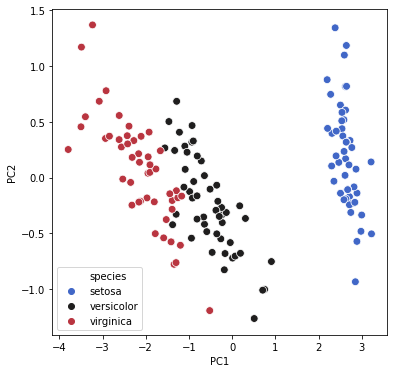

In [22]:
import seaborn as sb
import matplotlib.pyplot as plt
 
plt.figure(figsize = (6,6))
sb.scatterplot(data = pca_df, x = 'PC1',y = 'PC2' ,hue = df.iloc[:,-1], s = 60 , palette= 'icefire')

### Performance of MLP without dimensionality reduction

In [31]:
#MLP 
x_train,x_test,y_train,y_test = train_test_split(np.array(iris)[:,:-1],np.array(iris)[:,-1],test_size=0.20)
scaler = StandardScaler()
scaler.fit(x_train)
# x_train = scaler.transform(x_train)
# x_test = scaler.transform(x_test)
model_fit_and_predict(x_train,y_train,x_test,y_test)

Training time: 0.34027957916259766s
Accuracy:  0.9666666666666667
Confusion Matrix
[[12  0  0]
 [ 0 11  0]
 [ 0  1  6]]
Performance Evaluation
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        12
  versicolor       0.92      1.00      0.96        11
   virginica       1.00      0.86      0.92         7

    accuracy                           0.97        30
   macro avg       0.97      0.95      0.96        30
weighted avg       0.97      0.97      0.97        30



## Comparison of LDA and PCA

In [32]:
iris = pd.read_csv("iris_data.csv")
df = iris.copy()

In [33]:
# LDA dataset
data = df
x = df.iloc[:,:-1]
#target = df.iloc[:,-1]
class_le = LabelEncoder()
y = class_le.fit_transform(df.iloc[:, -1].values)

x= LDA(x, y)
lda_df = pd.DataFrame(x , columns = ['LD1','LD2'])
lda_df = pd.concat([lda_df , pd.DataFrame(y)] , axis = 1)
lda_df.columns=["LD1","LD2","target"]
lda_df.head()

Eigenvalues in decreasing order:

1581.325932186763
13.600776328162324
2.233044981586705e-13
3.7422465181580165e-14


,LD1,LD2,target
0,-1.790936,0.115414,0
1,-1.583202,-0.265463,0
2,-1.663881,-0.083657,0
3,-1.514646,-0.225901,0
4,-1.807076,0.189973,0


In [34]:
#LDA MLP 
ldax_train,ldax_test,lday_train,lday_test = train_test_split(np.array(lda_df)[:,:-1],np.array(lda_df)[:,-1],test_size=0.20)
model_fit_and_predict(ldax_train,lday_train,ldax_test,lday_test)

Training time: 0.28621697425842285s
Accuracy:  0.9333333333333333
Confusion Matrix
[[10  0  0]
 [ 0 11  0]
 [ 0  2  7]]
Performance Evaluation
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00        10
         1.0       0.85      1.00      0.92        11
         2.0       1.00      0.78      0.88         9

    accuracy                           0.93        30
   macro avg       0.95      0.93      0.93        30
weighted avg       0.94      0.93      0.93        30



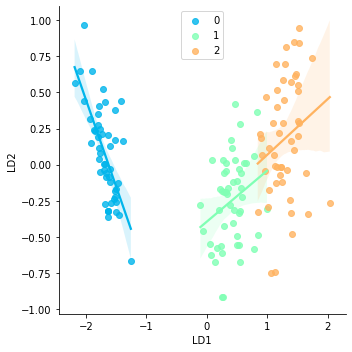

In [35]:
import seaborn as sns
markers = ['x','o']
sns.lmplot(x="LD1", y="LD2", data=lda_df, hue='target',legend=False, palette='rainbow')
plt.legend(loc='upper center')
plt.show()

# Spot
Implement Independent component analysis(ICA) (5)
Perform blink removal in EEG dataset using ICA
https://github.com/ShawhinT/YouTube-Blog/tree/main/ica
Show that performing PCA followed by ICAwill give better results?

In [65]:
import numpy as np
np.random.seed(0)
from scipy import signal
from scipy.io import wavfile
from matplotlib import pyplot as plt
import seaborn as sns
sns.set(rc={'figure.figsize':(11.7,8.27)})

In [66]:
def g(x):
    return np.tanh(x)
def g_der(x):
    return 1 - g(x) * g(x)

In [67]:
def center(X):
    X = np.array(X)
    
    mean = X.mean(axis=1, keepdims=True)
    
    return X- mean

In [68]:
def whitening(X):
    cov = np.cov(X)
    d, E = np.linalg.eigh(cov)
    D = np.diag(d)
    D_inv = np.sqrt(np.linalg.inv(D))
    X_whiten = np.dot(E, np.dot(D_inv, np.dot(E.T, X)))
    return X_whiten

In [69]:
def calculate_new_w(w, X):
    w_new = (X * g(np.dot(w.T, X))).mean(axis=1) - g_der(np.dot(w.T, X)).mean() * w
    w_new /= np.sqrt((w_new ** 2).sum())
    return w_new

In [70]:
def ica(X, iterations, tolerance=1e-5):
    X = center(X)
    
    X = whitening(X)
        
    components_nr = X.shape[0]
    W = np.zeros((components_nr, components_nr), dtype=X.dtype)
    for i in range(components_nr):
            
            w = np.random.rand(components_nr)
            
            for j in range(iterations):
                
                w_new = calculate_new_w(w, X)
                
                if i >= 1:
                    w_new -= np.dot(np.dot(w_new, W[:i].T), W[:i])
                
                distance = np.abs(np.abs((w * w_new).sum()) - 1)
                
                w = w_new
                
                if distance < tolerance:
                    break
                    
            W[i, :] = w
            
    S = np.dot(W, X)
        
    return S

In [71]:
def plot_mixture_sources_predictions(X, original_sources, S):
    fig = plt.figure()
    plt.subplot(3, 1, 1)
    for x in X:
        plt.plot(x)
    plt.title("mixtures")
    plt.subplot(3, 1, 2)
    for s in original_sources:
        plt.plot(s)
    plt.title("real sources")
    plt.subplot(3,1,3)
    for s in S:
        plt.plot(s)
    plt.title("predicted sources")
    
    fig.tight_layout()
    plt.show()

In [72]:
def mix_sources(mixtures, apply_noise=False):
    for i in range(len(mixtures)):
        
        max_val = np.max(mixtures[i])
        
        if max_val > 1 or np.min(mixtures[i]) < 1:
            
            mixtures[i] = mixtures[i] / (max_val / 2) - 0.5
            
    X = np.c_[[mix for mix in mixtures]]
    
    if apply_noise:
        
        X += 0.02 * np.random.normal(size=X.shape)
        
    return X

In [73]:
n_samples = 2000
time = np.linspace(0, 8, n_samples)
s1 = np.sin(2 * time)  # sinusoidal
s2 = np.sign(np.sin(3 * time))  # square signal
s3 = signal.sawtooth(2 * np.pi * time)  # saw tooth signal

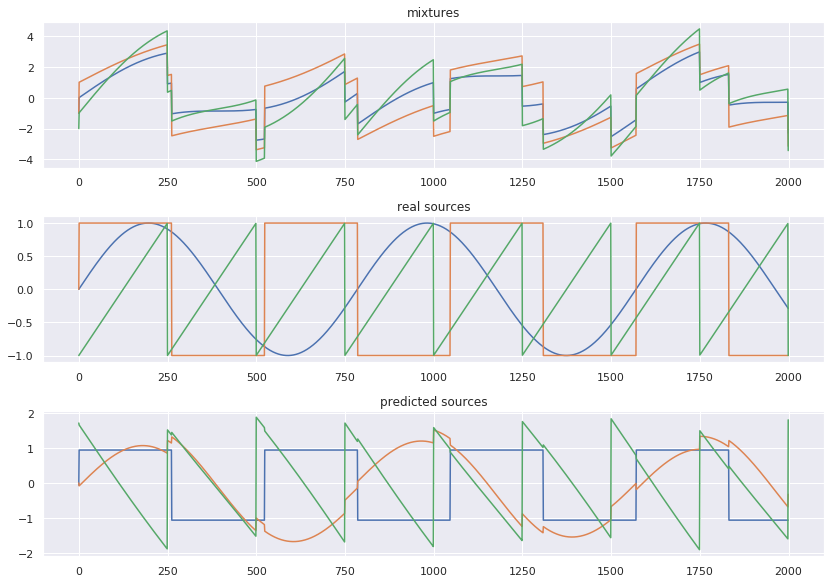

In [74]:
X = np.c_[s1, s2, s3]
A = np.array(([[1, 1, 1], [0.5, 2, 1.0], [1.5, 1.0, 2.0]]))
X = np.dot(X, A.T)
X = X.T
S = ica(X, iterations=1000)
plot_mixture_sources_predictions(X, [s1, s2, s3], S)

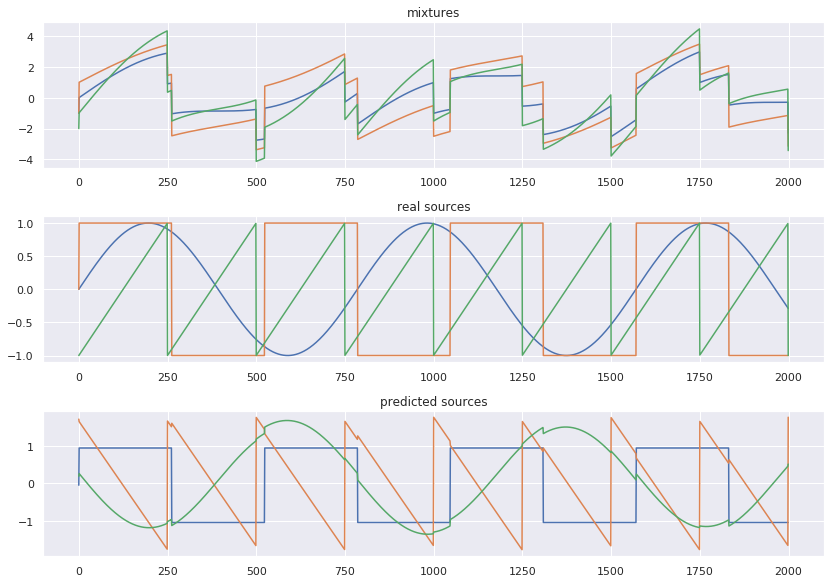

In [75]:
X = np.c_[s1, s2, s3]
A = np.array(([[1, 1, 1], [0.5, 2, 1.0], [1.5, 1.0, 2.0]]))
X = np.dot(X, A.T)
X = X.T
S = ica(X, iterations=1000)
plot_mixture_sources_predictions(X, [s1, s2, s3], S)

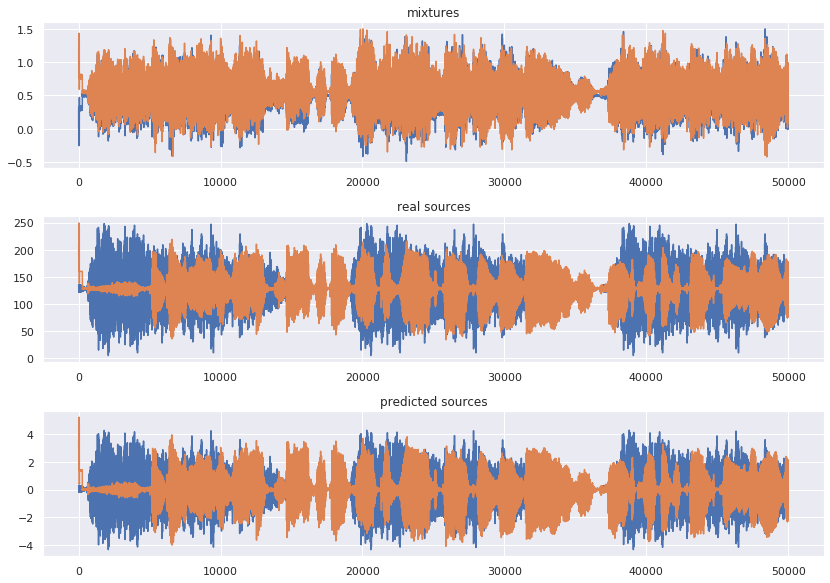

In [76]:
sampling_rate, mix1 = wavfile.read('mix1.wav')
sampling_rate, mix2 = wavfile.read('mix2.wav')
sampling_rate, source1 = wavfile.read('source1.wav')
sampling_rate, source2 = wavfile.read('source2.wav')
X = mix_sources([mix1, mix2])
S = ica(X, iterations=1000)
plot_mixture_sources_predictions(X, [source1, source2], S)
wavfile.write('out1.wav', sampling_rate, S[0])
wavfile.write('out2.wav', sampling_rate, S[1])

In [77]:
import h5py
import numpy as np
import matplotlib.pyplot as plt

filepath = 'EEG_data.mat'
arrays = {}
f = h5py.File(filepath)
for k, v in f.items():
    arrays[k] = np.array(v)

/home/mona/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: H5pyDeprecationWarning: The default file mode will change to 'r' (read-only) in h5py 3.0. To suppress this warning, pass the mode you need to h5py.File(), or set the global default h5.get_config().default_file_mode, or set the environment variable H5PY_DEFAULT_READONLY=1. Available modes are: 'r', 'r+', 'w', 'w-'/'x', 'a'. See the docs for details.
  import sys


In [78]:
df = pd.DataFrame(arrays['Data'])

In [79]:
import numpy as np
import scipy.signal as sps
from sklearn.decomposition import FastICA
import matplotlib.pyplot as plt

In [80]:
np.random.seed(42)

n = 1000
fs = 100
noise = 3
t = np.arange(n)
alpha = np.abs(np.sin(10 * t / fs)) - 0.5
alpha[n//2:] = 0
blink = np.zeros(n)
blink[n//2::200] += -1
blink = sps.lfilter(*sps.butter(2, [1*2/fs, 10*2/fs], 'bandpass'), blink)

frontal = blink * 200 + alpha * 10 + np.random.randn(n) * noise
central = blink * 100 + alpha * 15 + np.random.randn(n) * noise
parietal = blink * 10 + alpha * 25 + np.random.randn(n) * noise

eeg = np.stack([frontal, central, parietal]).T  # shape = (100, 3)

Text(0, 0.5, 'original data')

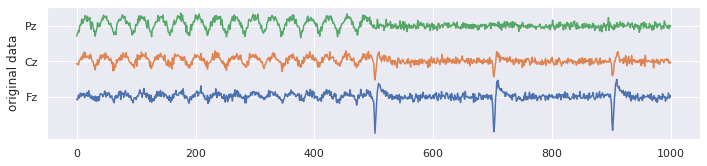

In [81]:
plt.subplot(3, 1, 1)
plt.plot(frontal + 50)
plt.plot(central + 100)
plt.plot(parietal + 150)
plt.yticks([50, 100, 150], ['Fz', 'Cz', 'Pz'])
plt.ylabel('original data')

In [82]:
ica = FastICA(n_components=3)
ica.fit(eeg)
components = ica.transform(eeg)

Text(0, 0.5, 'components')

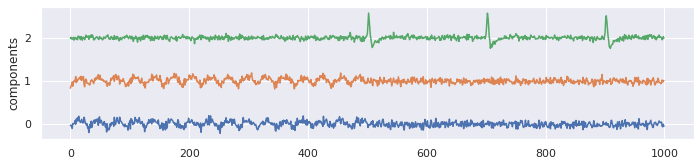

In [83]:
plt.subplot(3, 1, 2)
# plt.plot([[np.nan, np.nan, np.nan]])
plt.plot(components + [0.5, 1.0, 1.5])
plt.yticks([0.5, 1.0, 1.5], ['0', '1', '2'])
plt.ylabel('components')

Text(0, 0.5, 'cleaned data')

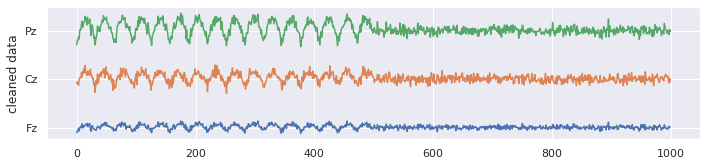

In [84]:
components[:, 2] = 0

restored = ica.inverse_transform(components)

plt.subplot(3, 1, 3)
plt.plot(restored + [50, 100, 150])
plt.yticks([50, 100, 150], ['Fz', 'Cz', 'Pz'])
plt.ylabel('cleaned data')

In [85]:
def PCA(X,num_comp):
    X_meaned = X - np.mean(X,axis=0)
    cov_mat = np.cov(X_meaned,rowvar=False)
    
    eigval,eigvec = np.linalg.eigh(cov_mat)
    
    sorted_index = np.argsort(eigval)[::-1]
    
    sorted_eigval = eigval[sorted_index]
    sorted_eigvec = eigvec[:,sorted_index]
    
    eigvec_subset = sorted_eigvec[:,0:num_comp]
    X_reduced = np.dot(eigvec_subset.T,X_meaned.T).T
    return X_reduced

In [86]:
reduced_mat = PCA(eeg,3)

In [87]:
reduced_mat.shape

(1000, 3)

In [88]:
ica = FastICA(n_components=3)
ica.fit(reduced_mat)
components = ica.transform(reduced_mat)

Text(0, 0.5, 'components')

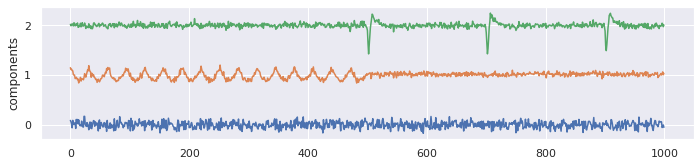

In [89]:
plt.subplot(3, 1, 2)
# plt.plot([[np.nan, np.nan, np.nan]])
plt.plot(components + [0.5, 1.0, 1.5])
plt.yticks([0.5, 1.0, 1.5], ['0', '1', '2'])
plt.ylabel('components')

Text(0, 0.5, 'cleaned data')

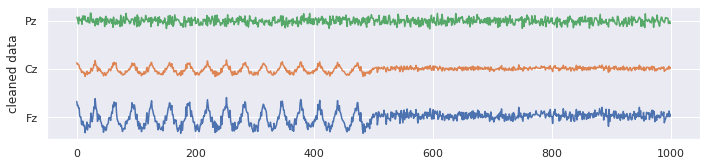

In [90]:
components[:, 2] = 0

restored = ica.inverse_transform(components)

plt.subplot(3, 1, 3)
plt.plot(restored + [50, 100, 150])
plt.yticks([50, 100, 150], ['Fz', 'Cz', 'Pz'])
plt.ylabel('cleaned data')